## Proyecto final BOOTCAMP IRONHACK
###### Estrategias de e-COMERCE

COMPANY = GYMSHARK

### PASO 5 RFM es una técnica utilizada para evaluar el valor de los clientes.
- website : https://eu.gymshark.com/

Teoría principal de RFM

RFM es un método utilizado para analizar el valor del cliente. 

Se utiliza comúnmente en marketing de bases de datos y marketing directo y ha recibido especial atención en las industrias minorista y de servicios profesionales.

RFM representa las tres dimensiones:

- Actualidad: ¿Qué tan recientemente compró el cliente?
- Frecuencia: ¿Con qué frecuencia compran?
- Valor monetario: ¿Cuánto gastan?

Las compras de los clientes pueden representarse mediante una tabla con columnas para el nombre del cliente, la fecha de compra y el valor de la compra. 

Un enfoque de RFM es asignar una puntuación a cada dimensión en una escala del 1 al 10. La puntuación máxima representa el comportamiento preferido y se podría utilizar una fórmula para calcular las tres puntuaciones para cada cliente.

Por ejemplo:

- Actualidad: el máximo de "10 – el número de meses que han pasado desde la última compra del cliente" y 1.
- Frecuencia: el máximo de "el número de compras realizadas por el cliente en los últimos 12 meses (con un límite de 10)" y 1.
- Monetario: el valor más alto de todas las compras realizadas por el cliente expresado como múltiplo de algún valor de referencia.

Nota: Las fórmulas que utilizamos en este cuaderno son diferentes a las principales. 

Explicaré las fórmulas de actualidad, frecuencia y monetaria que utilizamos en este cuaderno.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

In [2]:
# Importo el CSV de GYMSHARK SALES CLEAN resultante del fake
sales_gymshark = pd.read_csv('sales_gymshark_clean2.csv')
sales_gymshark.head()

,InvoiceNo,StockCode,Description,Size,Quantity,InvoiceDate,CustomerID,Country,Rating,Colour,Price,Category,Day,Month,Year,Hour,DayOfWeek
0,282618,76203V,Apex T-Shirt,L,1,2023-11-22 11:30:00,17849,Australia,4.5,River Stone Grey/Drift Grey,34.04,Men,22,11,2023,11:30:00,2
1,178838,43343R,Pursuit Duffle Bag,M,3,2023-12-25 11:54:00,90379,USA,4.6,Black/White,91.96,Women,25,12,2023,11:54:00,0
2,317707,11168Y,Everyday Mini Backpack,L,1,2023-03-30 09:05:00,73114,UK,0.0,Dusk Green,31.50,Women,30,3,2023,09:05:00,3
3,998032,21561X,No Show Performance Socks,S,6,2023-02-21 15:44:00,21105,USA,5.0,Plum Pink Marl,9.90,Men,21,2,2023,15:44:00,1
4,986803,64146P,GS X Libby Shorts,L,1,2023-03-12 09:29:00,23910,USA,4.2,Camo Brown,44.00,Men,12,3,2023,09:29:00,6


In [3]:
## Calular el valor total de cada compra:
sales_gymshark['Total'] = sales_gymshark['Quantity'] * sales_gymshark['Price']

In [4]:
## Total el valor monetario para cada cliente:
monetary = sales_gymshark.groupby('CustomerID')['Total'].sum()
monetary = pd.DataFrame(monetary).reset_index()
monetary.head()

,CustomerID,Total
0,17,1240.143
1,25,296.480
2,43,304.350
3,45,669.400
4,48,628.170


In [5]:
## Frecuencia de compra para cada cliente:
freq = sales_gymshark.drop_duplicates(subset=['InvoiceNo']).groupby('CustomerID')['InvoiceNo'].count()
freq = pd.DataFrame(freq).reset_index()
freq.head()

,CustomerID,InvoiceNo
0,17,14
1,25,6
2,43,4
3,45,8
4,48,6


In [6]:
def recency_correction(recency):
    if pd.isnull(recency):
        return 0  # O cualquier otro valor predeterminado que desees asignar para los valores nulos
    else:
        return int(round(recency))


In [7]:
sales_gymshark['Date'] = pd.to_datetime(sales_gymshark['InvoiceDate'])

In [8]:
## Suponemos  que hoy es el día después de la fecha máxima en los datos:
today =sales_gymshark['Date'].max()
today

Timestamp('2023-12-31 23:58:00')

In [9]:
## Calcula la Recencia para cada cliente:
##Utiliza la fecha más reciente en los datos como referencia y calcula la diferencia en días entre esa fecha y la fecha de la última compra de cada cliente. 
## Esto dará la recencia para cada cliente.

# Calcula la recencia para cada cliente
sales_gymshark['Recency'] = (today - sales_gymshark.groupby('CustomerID')['Date'].max()).dt.days
sales_gymshark['Recency'] = sales_gymshark['Recency'].apply(recency_correction)
sales_gymshark['Recency'] = sales_gymshark['Recency'].astype(int)


In [10]:
## Asigna puntajes RFM
## Utiliza las fórmulas especificadas en tu explicación para asignar puntajes a cada cliente en función de sus valores de Recencia, Frecuencia y Valor Monetario.
sales_gymshark['R_score'] = 10 - sales_gymshark['Recency'].apply(lambda x: min(x, 10))
sales_gymshark['F_score'] = sales_gymshark['CustomerID'].map(freq.set_index('CustomerID')['InvoiceNo']).fillna(0)
sales_gymshark['F_score'] = pd.cut(sales_gymshark['F_score'], bins=[0, 1, 2, 3, 4, 5, float('inf')], labels=[1, 2, 3, 4, 5, 6], right=False)
sales_gymshark['M_score'] = sales_gymshark['CustomerID'].map(monetary.set_index('CustomerID')['Total']).fillna(0)
sales_gymshark['M_score'] = pd.cut(sales_gymshark['M_score'], bins=[0, 100, 500, 1000, 2000, 5000, float('inf')], labels=[1, 2, 3, 4, 5, 6], right=False)


In [11]:
sales_gymshark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  int64         
 1   StockCode    100000 non-null  object        
 2   Description  100000 non-null  object        
 3   Size         100000 non-null  object        
 4   Quantity     100000 non-null  int64         
 5   InvoiceDate  100000 non-null  object        
 6   CustomerID   100000 non-null  int64         
 7   Country      100000 non-null  object        
 8   Rating       100000 non-null  float64       
 9   Colour       100000 non-null  object        
 10  Price        100000 non-null  float64       
 11  Category     100000 non-null  object        
 12  Day          100000 non-null  int64         
 13  Month        100000 non-null  int64         
 14  Year         100000 non-null  int64         
 15  Hour         100000 non-null  objec

In [12]:
## Calcular el puntaje RFM total:
## Suma los puntajes individuales de Recencia, Frecuencia y Valor Monetario para obtener el puntaje RFM total para cada cliente
# Asigna puntajes RFM
sales_gymshark['R_score'] = 10 - sales_gymshark['Recency'].apply(lambda x: min(x, 10))
sales_gymshark['F_score'] = pd.cut(sales_gymshark['F_score'], bins=[0, 1, 2, 3, 4, 5, float('inf')], labels=[1, 2, 3, 4, 5, 6], right=False)
sales_gymshark['M_score'] = pd.cut(sales_gymshark['M_score'], bins=[0, 100, 500, 1000, 2000, 5000, float('inf')], labels=[1, 2, 3, 4, 5, 6], right=False)


In [13]:
## Calcular el puntaje RFM total:
## Suma los puntajes individuales de Recencia, Frecuencia y Valor Monetario para obtener el puntaje RFM total para cada cliente.

# Calcula el puntaje RFM total
sales_gymshark['RFM_score'] =sales_gymshark['R_score'].astype(int) + sales_gymshark['F_score'].astype(int) + sales_gymshark['M_score'].astype(int)


In [14]:
sales_gymshark["RFM_score"].unique()

array([17, 15,  7, 10,  6, 11,  4, 16, 12,  9, 14,  8, 13,  5])

Mejor: Los clientes con puntajes altos en todas las dimensiones: Recencia baja (1), Frecuencia alta (1) y Valor Monetario alto (7).

Casi perdido: Los clientes con una Recencia alta (8), pero con puntajes bajos en Frecuencia (9) y Valor Monetario (10).

Grandes gastadores perdidos: Los clientes con puntajes altos en Frecuencia (10) y Valor Monetario (10), pero con una Recencia alta (11).

Perdido barato: Los clientes con una Recencia alta (12) y puntajes bajos en Frecuencia (13), pero un Valor Monetario alto (14).

Leal: Los clientes con puntajes altos en Frecuencia (15), independientemente de los puntajes de Recencia y Valor Monetario. Aquí, el '?' en la posición de la Recencia indica que puede ser 4, lo que significa que la Recencia puede ser baja.

Grandes gastadores: Los clientes con un puntaje alto en Valor Monetario (16), independientemente de los puntajes de Recencia y Frecuencia. Aquí, el '?' en la posición de la Recencia y la Frecuencia indica que pueden ser 4, lo que significa que tanto la Recencia como la Frecuencia pueden ser bajas.

Normal: Los clientes cuyos puntajes de RFM no cumplen ninguna de las condiciones anteriores. Esto podría significar que sus puntajes están distribuidos de manera más equitativa o no cumplen con los criterios específicos de ningún segmento en particular.

Estas reglas están adaptadas para reflejar los valores únicos en tu conjunto de datos y pueden proporcionar segmentaciones más precisas y significativas para tus clientes.

In [15]:
def get_group(RFM_score):
    RFM_score = str(RFM_score)  # Convertir a cadena si no lo es
    if len(RFM_score) < 1:
        return 'Normal'  # O cualquier valor predeterminado que desees asignar
    elif RFM_score == '17':
        return 'Best'
    elif RFM_score == '89':
        return 'Almost Lost'
    elif RFM_score == '1010':
        return 'Lost Big Spenders'
    elif RFM_score == '1213':
        return 'Lost Cheap'
    elif len(RFM_score) >= 2 and RFM_score[1] == '5':
        return 'Loyal'
    elif len(RFM_score) >= 3 and RFM_score[2] == '6':
        return 'Big Spenders'
    else:
        return 'Normal'



In [16]:
sales_gymshark['Segment'] = sales_gymshark['RFM_score'].astype(str).apply(get_group)


In [17]:
sales_gymshark_customer_segments = sales_gymshark[['CustomerID', 'Segment']]
sales_gymshark_customer_segments

,CustomerID,Segment
0,17849,Best
1,90379,Best
2,73114,Best
3,21105,Best
4,23910,Best
...,...,...
99995,314,Normal
99996,47633,Normal
99997,18220,Normal
99998,27167,Best


In [18]:
segment_group = sales_gymshark_customer_segments.groupby('Segment').count()
segment_group = segment_group.reset_index()
segment_group.columns = ['Segment', 'Count']
segment_group.head()

,Segment,Count
0,Best,82506
1,Loyal,1356
2,Normal,16138


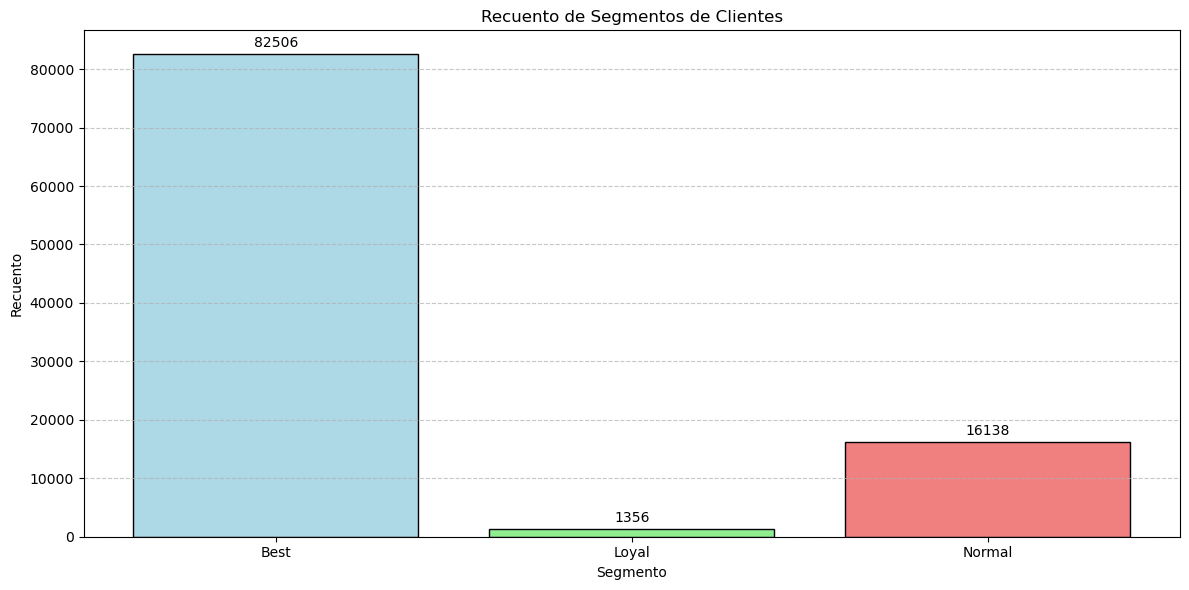

In [19]:
import matplotlib.pyplot as plt

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgrey', 'lightsalmon']

# Graficar las barras
bars = ax.bar(segment_group['Segment'], segment_group['Count'], color=colors, edgecolor='black')

# Agregar etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Ajustar el diseño de la figura y agregar títulos y etiquetas
ax.set_title('Recuento de Segmentos de Clientes')
ax.set_xlabel('Segmento')
ax.set_ylabel('Recuento')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
